<a href="https://colab.research.google.com/github/silviabarasa/Cryptocurrency-Price-Prediction/blob/main/Cryptocurrency_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Defining the question

### a.) Specifying data analytic question

 Using the trading time series of a cryptocurrency’s price, in addition to a set of qualitative features (news, social impact, Twitter, Reddit, social media sentiment analysis), we would like to build a model that forecasts a cryptocurrency’s price. In this challenge, we are focusing on the trading time series and how we can optimize currency forecasting. We will predict future cryptocurrency prices.



### b.) Defining metric for success

### c.)Understanding the context

After the boom and bust of cryptocurrencies’ prices in recent years, cryptocurrencies have been increasingly regarded as an investment asset. Because of their highly volatile nature, there is a need for good predictions on which to base investment decisions. Different existing studies have leveraged machine learning for more accurate cryptocurrency price prediction. We are interested in applying different modeling techniques to samples with different data structures (qualitative and quantitative data) and dimensional features to achieve an optimization in price prediction.

**NB:** The target value is the actual price. We have data extracted in an interval of 1h for a period of one year (from 1st of March 2020 to 1st of March 2021). We are interested in predicting the values of cryptocurrency prices in specific timestamps that we have in the validation file.

### d.) Recording experimental design

### e.) Data Relevance

## Reading the data

### Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from yellowbrick.model_selection import validation_curve
from sklearn.ensemble import RandomForestRegressor 
import lightgbm

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


### Loading datasets

In [2]:
df = pd.read_csv('Train.csv')

In [3]:
test = pd.read_csv('Test.csv')

## Checking the data

### Previewing the top of our dataset

In [4]:
df.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
0,ID_322qz6,1,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1689.0,817.0,55.0,105.0,61.0,271.0,3420.0,1671.0,11675867.0,39.0,1343.0,448.0,2237.0,124.0,330.0,331.0,2515.0,120.0,506133.0,1326610.0,1159677.0,8406185.0,281329.0,11681999.0,3.6,69.0,2.7,3.6,3.3,66.0,0.007118,1.0,606.0,2.0,1.0,1.0,2.0,5.0,4422.0,1.434516,2.818066e+11,9428.279323
1,ID_3239o9,1,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,920.0,544.0,20.0,531.0,103.0,533.0,1491.0,242.0,5917814.0,195.0,1070.0,671.0,3888.0,1.0,52.0,315.0,1100.0,23.0,1320.0,381117.0,1706376.0,3754815.0,80010.0,5924770.0,3.7,1.0,2.0,2.0,1.0,43.5,0.009419,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2159.0,-2.459507,2.126897e+11,7967.567267
2,ID_323J9k,1,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,1446.0,975.0,72.0,1152.0,187.0,905.0,9346.0,4013.0,47778746.0,104.0,2014.0,1099.0,11476.0,331.0,923.0,864.0,6786.0,442.0,9848462.0,5178557.0,2145663.0,25510267.0,5110490.0,47796942.0,3.7,22.0,3.1,3.0,3.3,65.5,0.013530,1.0,692.0,3.0,1.0,1.0,NaN,NaN,10602.0,4.942448,1.530712e+12,49120.738484
3,ID_323y5P,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,424.0,268.0,443.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285.0,NaN,NaN,NaN
4,ID_324kJH,1,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,1012.0,638.0,24.0,42.0,50.0,173.0,3262.0,1652.0,14422172.0,21.0,511.0,190.0,2284.0,86.0,280.0,443.0,2284.0,169.0,311017.0,1977833.0,731277.0,10964321.0,440730.0,14426405.0,3.7,22.0,4.7,3.8,4.4,83.0,0.010332,1.0,749.0,2.0,1.0,1.0,NaN,2.0,3996.0,2.609576,3.386925e+11,10384.798216


In [5]:
test.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global
0,ID_323Sn2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,56.0,2.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN
1,ID_325SNW,1,11335.062188,11351.690956,11335.062188,1.064152e+09,2.101463e+11,1664.0,1045.0,64.0,213.0,51.0,274.0,6046.0,3034.0,23453171.0,119.0,2305.0,1367.0,6252.0,151.0,565.0,603.0,4553.0,174.0,2900568.0,1898920.0,2268741.0,14056214.0,2338771.0,23465365.0,3.7,39.0,3.2,3.4,2.8,65.5,0.004407,1.0,711.0,2.0,1.0,1.0,1.0,1.0,7245,-0.555698,3.631052e+11
2,ID_325uzE,1,6322.560756,6328.362354,6294.714484,1.516268e+09,1.153862e+11,397.0,255.0,11.0,72.0,30.0,112.0,2404.0,304.0,3831278.0,12.0,346.0,73.0,604.0,39.0,103.0,668.0,1406.0,188.0,29147.0,411178.0,873284.0,2389256.0,129448.0,3832828.0,3.7,2.0,3.0,3.0,3.4,65.5,0.024035,1.0,715.0,2.0,1.0,1.0,NaN,NaN,2702,1.689370,1.771075e+11
3,ID_328qCx,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,96.0,217.0,244.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225,NaN,NaN
4,ID_3293uJ,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,49.0,33.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,NaN,NaN


### previewing the bottom of our dataset

In [6]:
df.tail()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
7767,ID_4Xr86L,1,7105.706747,7105.706747,7099.324537,1.723411e+09,1.299737e+11,718.0,469.0,31.0,168.0,47.0,141.0,2247.0,351.0,9118746.0,37.0,402.0,162.0,1016.0,63.0,105.0,492.0,1466.0,121.0,174235.0,171371.0,1347103.0,7259196.0,168458.0,9121390.0,3.7,19.0,2.5,4.1,2.8,65.5,0.005197,1.0,969.0,2.0,1.0,1.0,NaN,4.0,2813.0,0.364590,2.047626e+11,7099.324537
7768,ID_4XrSgt,1,47935.193357,47982.398297,47759.228429,1.947053e+09,8.901998e+11,2640.0,1763.0,130.0,636.0,252.0,904.0,14238.0,3570.0,108245683.0,1111.0,8436.0,2851.0,51528.0,394.0,2063.0,1292.0,9927.0,562.0,7260348.0,13687501.0,5009515.0,68594392.0,13757853.0,108313789.0,3.6,34.0,3.8,4.1,3.4,74.5,0.018518,1.0,1135.0,3.0,1.0,1.0,NaN,1.0,16417.0,0.467914,1.507142e+12,47918.574691
7769,ID_4XrzBT,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,21.0,43.0,118.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,NaN,NaN,NaN
7770,ID_4XsPst,1,8052.540280,8067.424818,8052.540280,4.321598e+08,1.464165e+11,823.0,491.0,18.0,744.0,52.0,376.0,3220.0,322.0,11553381.0,51.0,709.0,640.0,3068.0,108.0,146.0,568.0,2213.0,185.0,1110686.0,1008404.0,1374494.0,7452301.0,611964.0,11559095.0,3.7,30.0,2.7,4.0,3.0,67.0,0.017957,1.0,907.0,2.0,1.0,1.0,NaN,NaN,3811.0,0.279020,2.152263e+11,8067.424818
7771,ID_4XsbUp,1,9192.199887,9192.584719,9190.573816,5.476545e+08,1.687046e+11,1708.0,1005.0,46.0,200.0,38.0,151.0,5447.0,678.0,13880154.0,77.0,1623.0,579.0,3435.0,102.0,297.0,1120.0,3632.0,296.0,147027.0,1214040.0,2172434.0,9788322.0,564045.0,13887927.0,3.7,22.0,3.2,4.0,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
test.tail()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global
6217,ID_zufSPk,1,8266.942912,8266.942912,8259.796103,310063715.0,1.491229e+11,618.0,438.0,15.0,202.0,42.0,164.0,996.0,262.0,3310472.0,19.0,217.0,135.0,715.0,2.0,25.0,273.0,671.0,25.0,987.0,187128.0,1174018.0,1933268.0,16157.0,3318645.0,3.7,3.0,2.4,2.3,3.9,61.5,0.007076,1.0,921.0,2.0,1.0,1.0,NaN,NaN,1494,-0.967973,2.262125e+11
6218,ID_zuz9yf,1,10869.612767,10873.493490,10865.827625,698936037.0,2.011601e+11,1608.0,911.0,84.0,204.0,45.0,123.0,5994.0,3808.0,30985192.0,219.0,3020.0,1416.0,7673.0,196.0,502.0,605.0,4484.0,207.0,14614866.0,1739950.0,2052440.0,12246575.0,343689.0,30999455.0,3.7,31.0,2.9,3.9,3.0,67.5,0.005486,1.0,807.0,2.0,1.0,1.0,NaN,6.0,7065,NaN,3.523272e+11
6219,ID_zvrMSX,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,139.0,167.0,317.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175,NaN,NaN
6220,ID_zy9Cfv,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN
6221,ID_zyAFd7,1,7058.172796,7078.973345,7052.332304,473093253.0,1.275507e+11,954.0,672.0,20.0,110.0,65.0,2459.0,2708.0,291.0,10140687.0,15.0,399.0,121.0,838.0,97.0,243.0,502.0,1689.0,177.0,237801.0,1389120.0,1272925.0,6398945.0,843269.0,10143186.0,3.6,4.0,3.1,3.0,2.8,62.5,0.012064,1.0,858.0,2.0,1.0,1.0,NaN,NaN,3469,-3.289226,1.926557e+11


### Dataset information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7772 entries, 0 to 7771
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7772 non-null   object 
 1   asset_id                 7772 non-null   int64  
 2   open                     5262 non-null   float64
 3   high                     5262 non-null   float64
 4   low                      5262 non-null   float64
 5   volume                   5256 non-null   float64
 6   market_cap               5117 non-null   float64
 7   url_shares               5235 non-null   float64
 8   unique_url_shares        5235 non-null   float64
 9   reddit_posts             7612 non-null   float64
 10  reddit_posts_score       7612 non-null   float64
 11  reddit_comments          7622 non-null   float64
 12  reddit_comments_score    7622 non-null   float64
 13  tweets                   5241 non-null   float64
 14  tweet_spam              

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6222 entries, 0 to 6221
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       6222 non-null   object 
 1   asset_id                 6222 non-null   int64  
 2   open                     4304 non-null   float64
 3   high                     4304 non-null   float64
 4   low                      4304 non-null   float64
 5   volume                   4302 non-null   float64
 6   market_cap               4191 non-null   float64
 7   url_shares               4285 non-null   float64
 8   unique_url_shares        4285 non-null   float64
 9   reddit_posts             6122 non-null   float64
 10  reddit_posts_score       6122 non-null   float64
 11  reddit_comments          6109 non-null   float64
 12  reddit_comments_score    6109 non-null   float64
 13  tweets                   4289 non-null   float64
 14  tweet_spam              

## External Data Source Validation

## Tidying the dataset

### Consistency

In [10]:
df.duplicated().sum()

0

In [11]:
test.duplicated().sum()

0

### Completeness

In [12]:
df.isnull().sum()

id                            0
asset_id                      0
open                       2510
high                       2510
low                        2510
volume                     2516
market_cap                 2655
url_shares                 2537
unique_url_shares          2537
reddit_posts                160
reddit_posts_score          160
reddit_comments             150
reddit_comments_score       150
tweets                     2531
tweet_spam                 2531
tweet_followers            2536
tweet_quotes               2536
tweet_retweets             2536
tweet_replies              2536
tweet_favorites            2536
tweet_sentiment1           2531
tweet_sentiment2           2531
tweet_sentiment3           2531
tweet_sentiment4           2531
tweet_sentiment5           2531
tweet_sentiment_impact1    2531
tweet_sentiment_impact2    2531
tweet_sentiment_impact3    2531
tweet_sentiment_impact4    2531
tweet_sentiment_impact5    2531
social_score               2531
average_

In [13]:
test.isnull().sum()

id                            0
asset_id                      0
open                       1918
high                       1918
low                        1918
volume                     1920
market_cap                 2031
url_shares                 1937
unique_url_shares          1937
reddit_posts                100
reddit_posts_score          100
reddit_comments             113
reddit_comments_score       113
tweets                     1933
tweet_spam                 1933
tweet_followers            1935
tweet_quotes               1935
tweet_retweets             1935
tweet_replies              1935
tweet_favorites            1935
tweet_sentiment1           1933
tweet_sentiment2           1933
tweet_sentiment3           1933
tweet_sentiment4           1933
tweet_sentiment5           1933
tweet_sentiment_impact1    1933
tweet_sentiment_impact2    1933
tweet_sentiment_impact3    1933
tweet_sentiment_impact4    1933
tweet_sentiment_impact5    1933
social_score               1933
average_

It is important to note that we have columns that have more importance than others and some of these include open and market cap. Therefore, we will first drop any rows where these  entries are missing. There is need to reexamine the dataset after that.

In [14]:
df.dropna(axis=0,
          subset = ['open', 'market_cap', 'market_cap_global', 'volatility', 'percent_change_24h', 'volume'],
          inplace = True)

In [15]:
# checking for remaining null values

df.isnull().sum()

id                            0
asset_id                      0
open                          0
high                          0
low                           0
volume                        0
market_cap                    0
url_shares                    5
unique_url_shares             5
reddit_posts                 13
reddit_posts_score           13
reddit_comments              13
reddit_comments_score        13
tweets                        0
tweet_spam                    0
tweet_followers               0
tweet_quotes                  0
tweet_retweets                0
tweet_replies                 0
tweet_favorites               0
tweet_sentiment1              0
tweet_sentiment2              0
tweet_sentiment3              0
tweet_sentiment4              0
tweet_sentiment5              0
tweet_sentiment_impact1       0
tweet_sentiment_impact2       0
tweet_sentiment_impact3       0
tweet_sentiment_impact4       0
tweet_sentiment_impact5       0
social_score                  0
average_

In [16]:
# for the test data, we have to subject it to the same procedures

test.dropna(axis=0,
          subset = ['open', 'market_cap', 'market_cap_global', 'volatility', 'percent_change_24h', 'volume'],
          inplace = True)

# checking remaining null values

test.isnull().sum()

id                            0
asset_id                      0
open                          0
high                          0
low                           0
volume                        0
market_cap                    0
url_shares                    3
unique_url_shares             3
reddit_posts                  5
reddit_posts_score            5
reddit_comments               4
reddit_comments_score         4
tweets                        0
tweet_spam                    0
tweet_followers               0
tweet_quotes                  0
tweet_retweets                0
tweet_replies                 0
tweet_favorites               0
tweet_sentiment1              0
tweet_sentiment2              0
tweet_sentiment3              0
tweet_sentiment4              0
tweet_sentiment5              0
tweet_sentiment_impact1       0
tweet_sentiment_impact2       0
tweet_sentiment_impact3       0
tweet_sentiment_impact4       0
tweet_sentiment_impact5       0
social_score                  0
average_

The remaining null values have no bearing if they are imputed with zeros. For example, reddit posts null values indicate no posts were shared on Reddit during that time.

Before that, there are several columns that have been either compiled into a single one(the social media columns) or have barely any usefulness upon performing extensive data walkthrough.

### Accuracy

In [17]:
# list of relevant columns to keep

useful = ['id', 'open', 'high', 'low', 'volume', 'market_cap', 'social_score',
          'average_sentiment', 'price_score', 'social_impact_score',
          'correlation_rank', 'volatility', 'market_cap_global',
          'percent_change_24h', 'close']

# appending relevant columns to an empty list
drop = []
for x in list(df.columns):
  if x not in useful:
    drop.append(x)

df.drop(labels= drop,
        axis = 1,
        inplace = True)

df.head()

,id,open,high,low,volume,market_cap,social_score,average_sentiment,price_score,social_impact_score,correlation_rank,volatility,percent_change_24h,market_cap_global,close
0,ID_322qz6,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,11681999.0,3.6,2.7,3.6,3.3,0.007118,1.434516,2.818066e+11,9428.279323
1,ID_3239o9,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,5924770.0,3.7,2.0,2.0,1.0,0.009419,-2.459507,2.126897e+11,7967.567267
2,ID_323J9k,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,47796942.0,3.7,3.1,3.0,3.3,0.013530,4.942448,1.530712e+12,49120.738484
4,ID_324kJH,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,14426405.0,3.7,4.7,3.8,4.4,0.010332,2.609576,3.386925e+11,10384.798216
6,ID_325m2L,9697.250948,9712.247413,9697.250948,1.231231e+09,1.767035e+11,30476752.0,3.7,3.5,3.0,3.1,0.008594,1.159070,2.807819e+11,9712.247413


In [18]:
# checking for null values in remaining columns

df.isnull().sum()

id                     0
open                   0
high                   0
low                    0
volume                 0
market_cap             0
social_score           0
average_sentiment      0
price_score            0
social_impact_score    0
correlation_rank       0
volatility             0
percent_change_24h     0
market_cap_global      0
close                  0
dtype: int64

In [19]:
drop = []
for x in list(test.columns):
  if x not in useful:
    drop.append(x)


# dropping irrelevant columns in test set

test.drop(labels = drop,
          axis = 1,
          inplace = True)

test.head()

,id,open,high,low,volume,market_cap,social_score,average_sentiment,price_score,social_impact_score,correlation_rank,volatility,percent_change_24h,market_cap_global
1,ID_325SNW,11335.062188,11351.690956,11335.062188,1.064152e+09,2.101463e+11,23465365.0,3.7,3.2,3.4,2.8,0.004407,-0.555698,3.631052e+11
2,ID_325uzE,6322.560756,6328.362354,6294.714484,1.516268e+09,1.153862e+11,3832828.0,3.7,3.0,3.0,3.4,0.024035,1.689370,1.771075e+11
5,ID_329H37,12309.911239,12317.022586,12286.508943,1.045155e+09,2.270841e+11,35113830.0,3.7,3.1,3.8,5.0,0.013678,3.920331,3.916727e+11
6,ID_32DnK8,9301.916435,9301.916435,9293.747775,6.607626e+08,1.705124e+11,23962084.0,3.6,2.8,4.0,3.2,0.009051,-0.510029,2.665700e+11
8,ID_32H6TE,9269.535206,9278.101979,9241.140352,5.767781e+08,1.690120e+11,9392039.0,3.7,3.2,4.3,3.8,0.018312,2.604443,2.523184e+11


In [20]:
test.isnull().sum()

id                     0
open                   0
high                   0
low                    0
volume                 0
market_cap             0
social_score           0
average_sentiment      0
price_score            0
social_impact_score    0
correlation_rank       0
volatility             0
percent_change_24h     0
market_cap_global      0
dtype: int64

In [21]:
# checking the shapes of the dataset after this procedure

df.shape, test.shape

((4894, 15), (4029, 14))

### Validity

### Outlier Handling


Checking for outliers using boxplots

In [22]:
# Creating a function that plots boxplots using a for loop

def plot_boxplots(target_dataframe,col_names):
    fig, ax = plt.subplots(len(col_names), figsize=(10,80))
    for i, column_name in enumerate(col_names):
        sns.boxplot(y=target_dataframe[column_name], ax=ax[i])
        ax[i].set_title('Box plot - {}'.format(column_name), fontsize=10)
        ax[i].set_xlabel(column_name, fontsize=8)

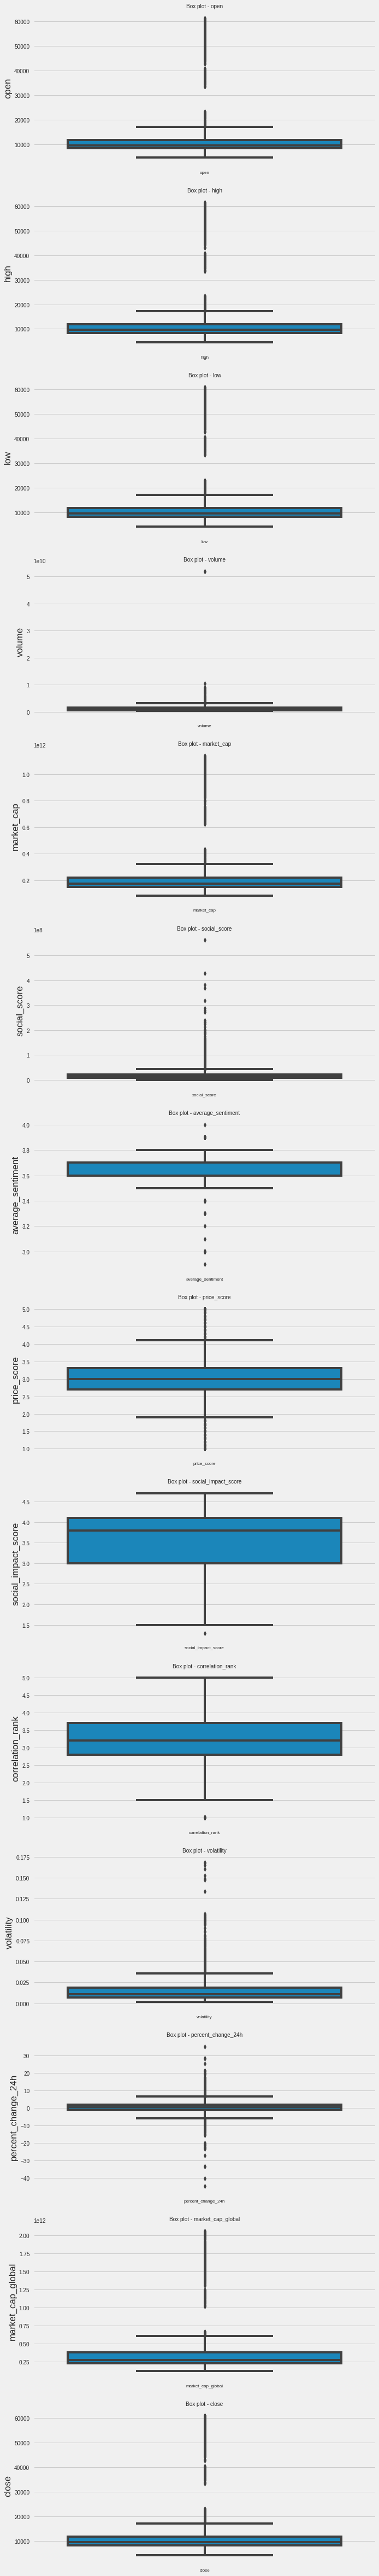

In [23]:
# Checking for outliers in our variables

col_names = [i for i in df.describe().columns]

plt.style.use('fivethirtyeight')
plot_boxplots(df,col_names)
plt.show()

> Locating the outliers to find out what they are and what effect they have on our data

In [24]:
# Index based search of outliers
indexes = []
percents = {}
percent_outliers = []
def percent_search(df):

  # for loop to create column interquantile ranges
  for x in df.describe().columns:
    q1 = df.describe().at['25%', x]
    q3 = df.describe().at['75%', x]
    iqr = q3 - q1

    # Upper and lower detection limits
    upper = q3 + iqr * 1.5
    lower = q1 - iqr * 1.5
    
    # catching percentage outliers in each column
    number = []
    
    # looping through entries in a column
    for pos, val in enumerate(df[x]):

      if val < lower or val > upper:
        number.append(pos)
        

        if pos not in indexes:
          indexes.append(pos)

    percent_outliers.append(len(number) / len(df[x]) * 100)

  percents = {column : percent for (column, percent) in zip(list(df.describe().columns), percent_outliers)}

  return  percents

In [25]:
# finding how outlier presence in columns

percent_search(df)

{'average_sentiment': 1.4711892112791174,
 'close': 18.941561095218635,
 'correlation_rank': 1.021659174499387,
 'high': 18.98242746219861,
 'low': 18.921127911728647,
 'market_cap': 18.839395177768697,
 'market_cap_global': 13.526767470371883,
 'open': 18.961994278708623,
 'percent_change_24h': 7.212913771965672,
 'price_score': 14.957090314671026,
 'social_impact_score': 0.02043318348998774,
 'social_score': 11.095218635063343,
 'volatility': 5.455659991826726,
 'volume': 4.597466285247242}

**Explanation**

The outliers accurately reflect how the real cryptocurrency prices vary in the market. On top of this, dropping them would cut our dataset in half. Therefore, the decision that was arrived at was one of keeping them as they are to avoid altering the data

In [26]:
# Export the csv
df.to_csv("ForyouJoy.csv")

## Exploratory Data Analysis

### Univariate Data Analysis

#### a) Measures of Central Tendency 

In [27]:
#finding the mean, median and mode
for i in df.describe().columns:
  print(f'for column {i}')
  print('mean:', df[i].mean())
  print('median:', df[i].median())
  print('mode:', df[i].mode())
  print('*********************************************** \n')
  

for column open
mean: 15401.830764109269
median: 9577.577888
mode: 0     8962.005410
1    47693.400837
2    48576.298407
3    48796.066697
4    49229.824483
dtype: float64
*********************************************** 

for column high
mean: 15456.219925273605
median: 9594.385012499999
mode: 0     8962.005410
1    48147.555596
2    48938.681089
3    49345.246937
4    49434.563608
dtype: float64
*********************************************** 

for column low
mean: 15344.691736074781
median: 9550.029229
mode: 0     8947.227578
1    47653.725479
2    48501.533986
3    48531.890737
4    48812.191759
dtype: float64
*********************************************** 

for column volume
mean: 1275846116.6497753
median: 979517534.5
mode: 0    1.662990e+09
1    2.032808e+09
2    2.431416e+09
3    2.496988e+09
4    5.185678e+10
dtype: float64
*********************************************** 

for column market_cap
mean: 284466535097.6353
median: 175374036536.0
mode: 0    8.935197e+11
1    9.09326

#### b) Measures of Dispersion

In [28]:
#Finding the measures of dispersion
for i in df.describe().columns:
  print(f'for column {i}')
  print('std: ', df[i].std())
  print('var: ', df[i].var())
  print('skewness: ', df[i].skew())
  print('kurtosis: ', df[i].kurt())
  print('************************************* \n')


for column open
std:  14369.131694764343
var:  206471945.66148117
skewness:  2.1381606191172224
kurtosis:  3.0213206874613023
************************************* 

for column high
std:  14456.756439447834
var:  208997806.74951643
skewness:  2.1371263794640316
kurtosis:  3.009678000201844
************************************* 

for column low
std:  14280.840171993586
var:  203942396.01802582
skewness:  2.138181057163368
kurtosis:  3.0266523275545882
************************************* 

for column volume
std:  1368818125.8355808
var:  1.873663061616032e+18
skewness:  21.269767055187714
kurtosis:  762.3930947205657
************************************* 

for column market_cap
std:  269005701852.73975
var:  7.236406762928511e+22
skewness:  2.1348244185723884
kurtosis:  3.0074703279585693
************************************* 

for column social_score
std:  27733010.700209185
var:  769119882497917.1
skewness:  5.905246567638986
kurtosis:  64.17209349174733
*****************************

#### Plotting histograms

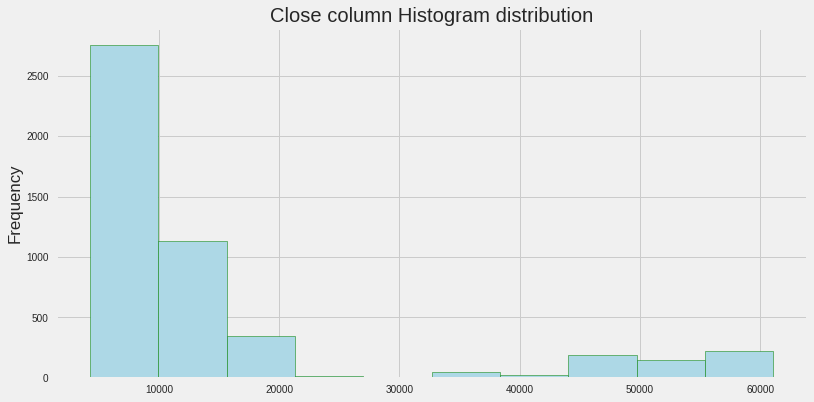

In [29]:
# Histogram of close column 
df.close.plot(kind='hist', facecolor='lightblue', edgecolor='green',
              figsize=(12,6))
plt.title("Close column Histogram distribution")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


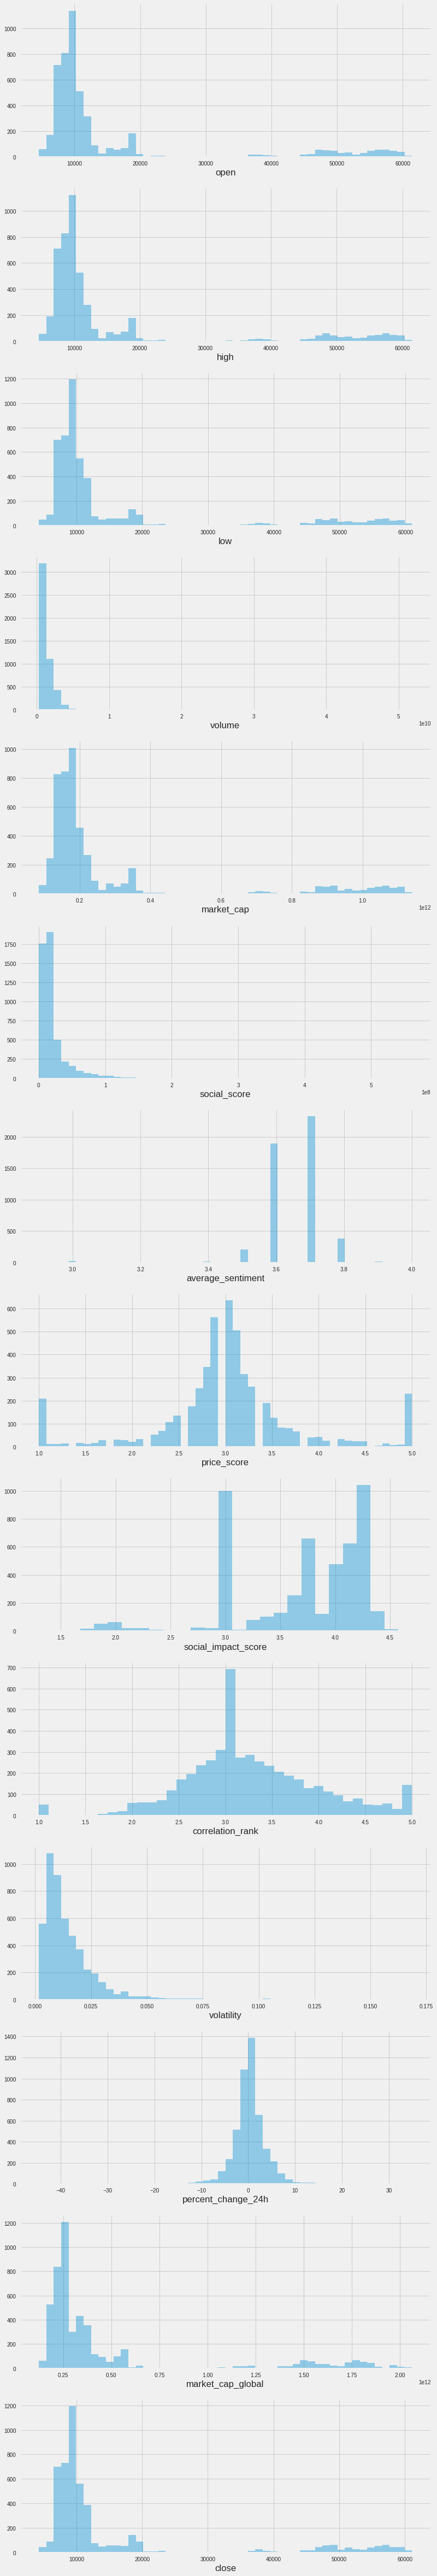

In [30]:
# plotting the histograms of numerical variables

fig, ax = plt.subplots(len(df.describe().columns), figsize=(12,80))
for x, col in enumerate(df.describe().columns):
  sns.distplot(df[col], ax=ax[x], kde=False)
  # ax[x].set_title('{}'.format(col), fontsize=10)
  # ax[x].set_xlabel(col, fontsize=8)

plt.show()



### Bivariate Data Analysis

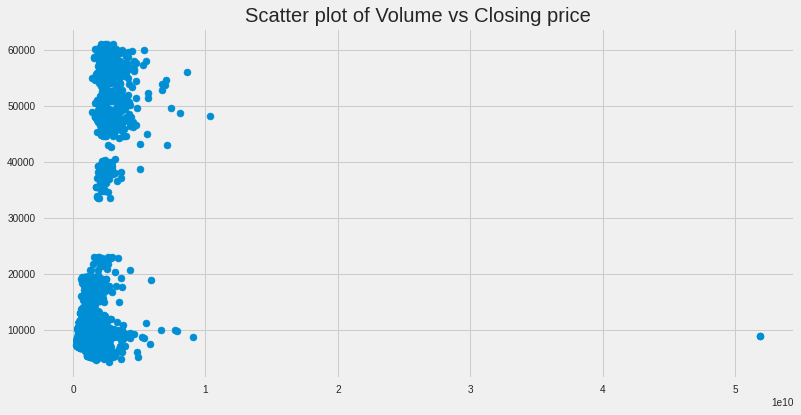

In [31]:
# scatter plot of volume vs close

plt.figure(figsize=(12, 6))
plt.scatter(df['volume'], df['close'])
plt.title("Scatter plot of Volume vs Closing price")
plt.show()

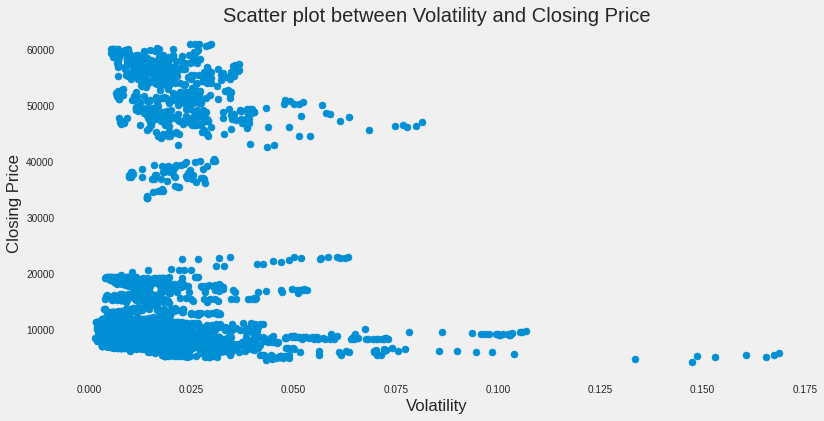

In [32]:
# scatter plot of volatility vs close

plt.figure(figsize=(12, 6))
plt.scatter(df['volatility'], df['close'])
plt.title("Scatter plot between Volatility and Closing Price")
plt.xlabel("Volatility")
plt.ylabel("Closing Price")
plt.grid()
plt.show()


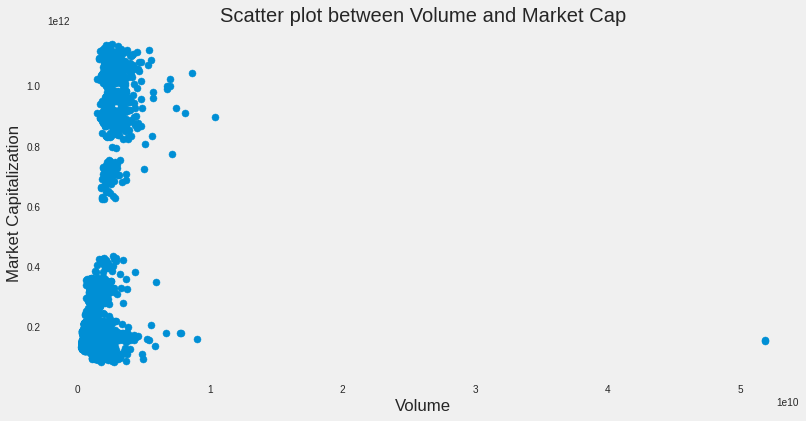

In [33]:
# scatter plot of volume vs market cap

plt.figure(figsize=(12, 6))
plt.scatter(df['volume'], df['market_cap'])
plt.title("Scatter plot between Volume and Market Cap")
plt.xlabel("Volume")
plt.ylabel("Market Capitalization")
plt.grid()
plt.show()

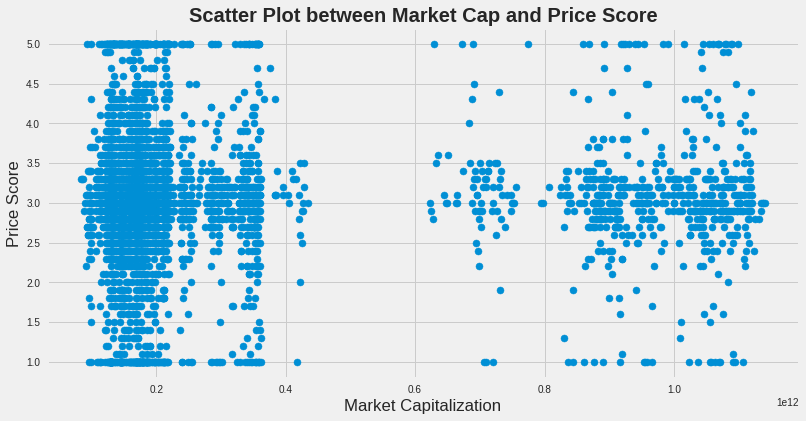

In [34]:
# scatter plot of market cap vs price score

plt.figure(figsize=(12, 6))
plt.scatter(df['market_cap'], df['price_score'])
plt.xlabel("Market Capitalization")
plt.ylabel("Price Score")
plt.title("Scatter Plot between Market Cap and Price Score", fontweight = 'bold')
plt.show()


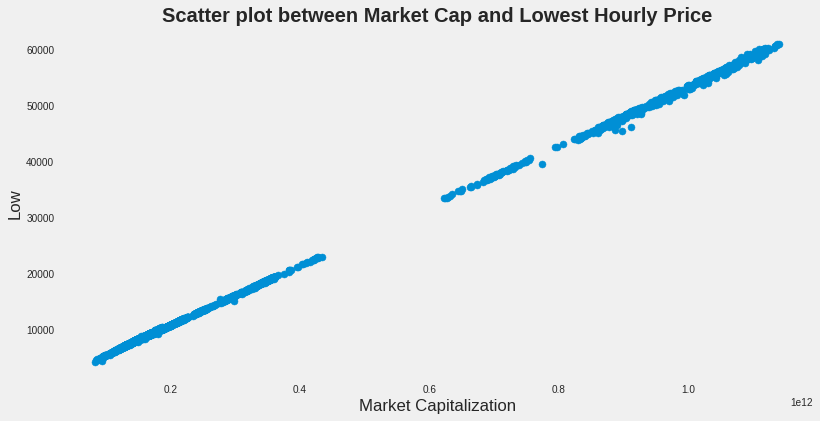

In [35]:
# scatter plot of market cap vs low

plt.figure(figsize=(12, 6))
plt.scatter(df['market_cap'], df['low'])
plt.title("Scatter plot between Market Cap and Lowest Hourly Price", fontweight='bold')
plt.xlabel("Market Capitalization")
plt.ylabel("Low")
plt.grid()
plt.show()

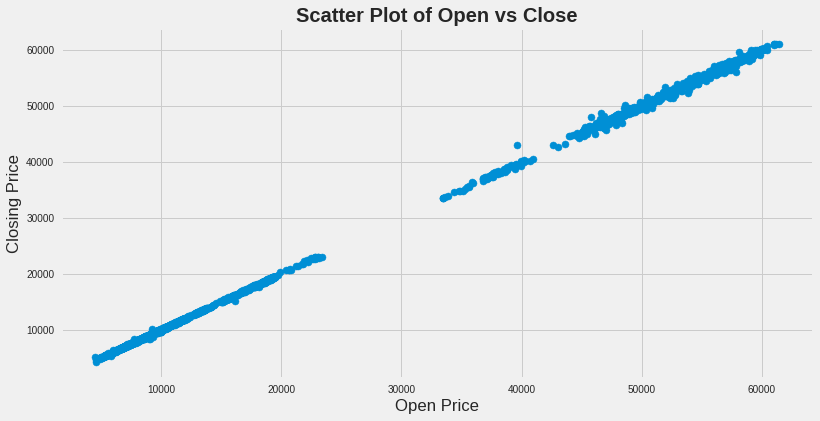

In [36]:
# scatter plot of open vs close

plt.figure(figsize=(12, 6))
plt.scatter(df['open'], df['close'])
plt.xlabel("Open Price")
plt.ylabel("Closing Price")
plt.title("Scatter Plot of Open vs Close", fontweight='bold')
plt.show()


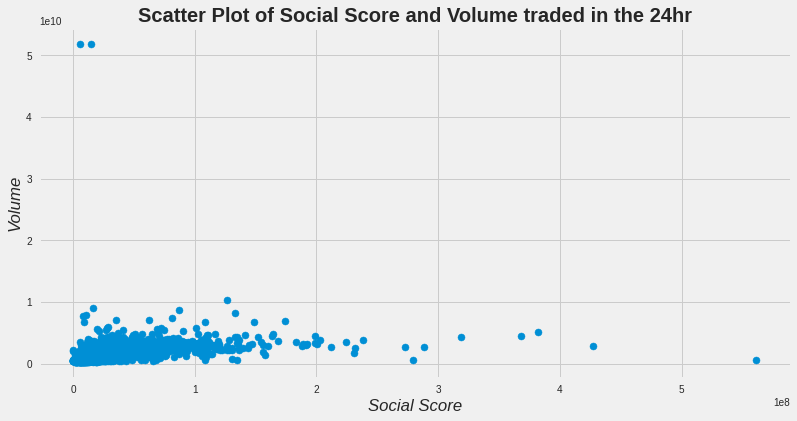

In [37]:
# scatter plot of social score vs volume

plt.figure(figsize=(12, 6))
plt.scatter(df['social_score'], df['volume'])
plt.title("Scatter Plot of Social Score and Volume traded in the 24hr", fontweight='bold')
plt.xlabel("Social Score", fontstyle='italic')
plt.ylabel("Volume", fontstyle='italic')
plt.show()


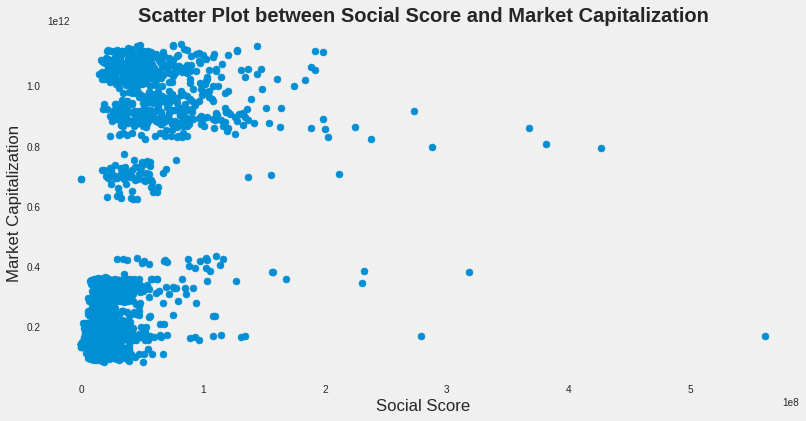

In [38]:
# scatter plot of social score vs market cap

plt.figure(figsize=(12, 6))
plt.scatter(df['social_score'], df['market_cap'])
plt.xlabel("Social Score")
plt.ylabel("Market Capitalization")
plt.title("Scatter Plot between Social Score and Market Capitalization", fontweight='bold')
plt.grid()
plt.show()

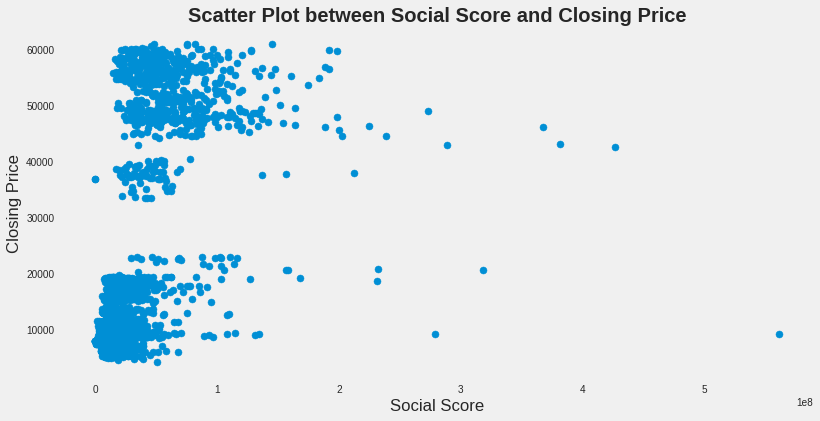

In [39]:
# scatter plot of social score vs close

plt.figure(figsize=(12, 6))
plt.scatter(df['social_score'], df['close'])
plt.title("Scatter Plot between Social Score and Closing Price", fontweight='bold')
plt.xlabel("Social Score")
plt.ylabel("Closing Price")
plt.grid()
plt.show()


<Figure size 7200x7200 with 0 Axes>

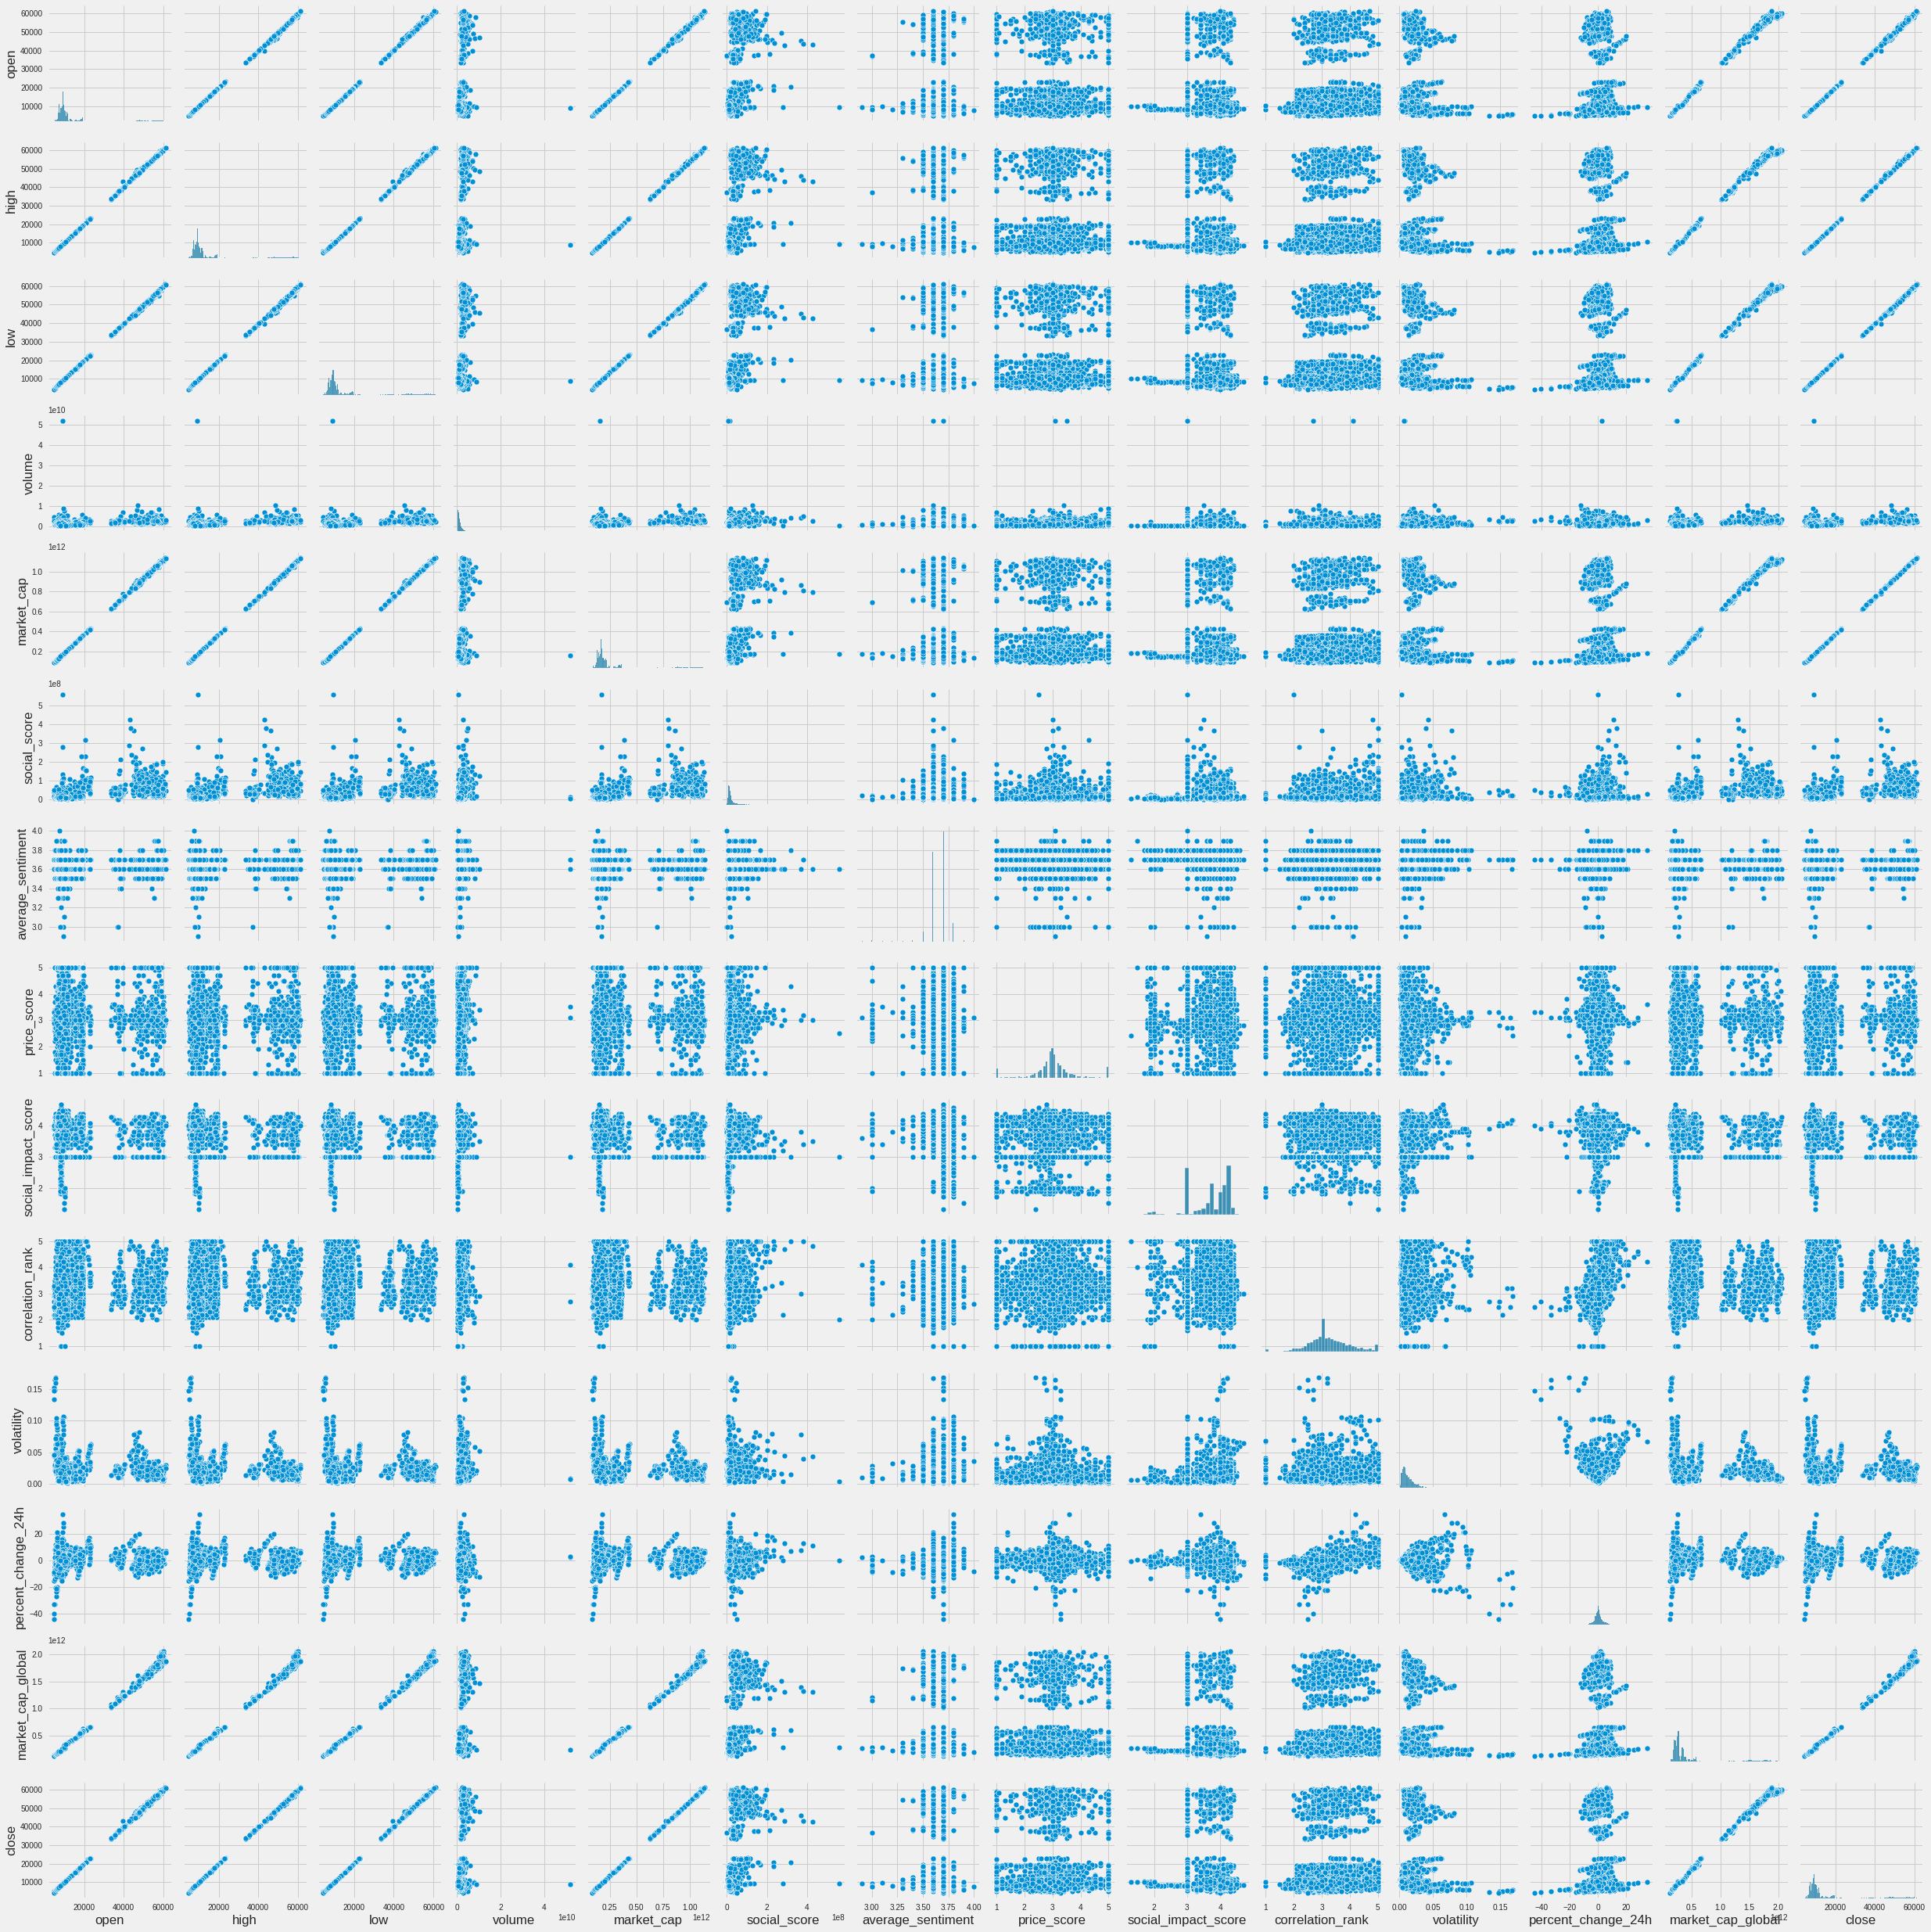

In [40]:
plt.figure(figsize=(100,100))
sns.pairplot(df)
plt.show()

In [41]:
# Correlation table of all the variables

correlations = df.corr()
correlations

,open,high,low,volume,market_cap,social_score,average_sentiment,price_score,social_impact_score,correlation_rank,volatility,percent_change_24h,market_cap_global,close
open,1.000000,0.999962,0.999958,0.428346,0.999930,0.607087,-0.089777,0.022523,-0.058593,0.040556,0.131092,0.087010,0.998866,0.999931
high,0.999962,1.000000,0.999932,0.429736,0.999959,0.608155,-0.089815,0.022883,-0.058592,0.040608,0.132778,0.087098,0.998821,0.999970
low,0.999958,0.999932,1.000000,0.426669,0.999952,0.606057,-0.089720,0.022381,-0.058634,0.040500,0.129749,0.088388,0.998971,0.999959
volume,0.428346,0.429736,0.426669,1.000000,0.428635,0.369232,-0.039408,0.064105,0.005715,0.051112,0.231335,0.028669,0.426194,0.428421
market_cap,0.999930,0.999959,0.999952,0.428635,1.000000,0.607594,-0.091065,0.023039,-0.057332,0.040541,0.131505,0.087691,0.999001,0.999978
social_score,0.607087,0.608155,0.606057,0.369232,0.607594,1.000000,-0.055199,0.037289,-0.011860,0.113489,0.238709,0.133521,0.598869,0.607243
average_sentiment,-0.089777,-0.089815,-0.089720,-0.039408,-0.091065,-0.055199,1.000000,-0.011448,-0.090843,0.036460,0.040512,0.097703,-0.097406,-0.089919
price_score,0.022523,0.022883,0.022381,0.064105,0.023039,0.037289,-0.011448,1.000000,0.022526,0.040542,-0.013233,0.019728,0.024363,0.022761
social_impact_score,-0.058593,-0.058592,-0.058634,0.005715,-0.057332,-0.011860,-0.090843,0.022526,1.000000,-0.007562,0.104802,0.038109,-0.053630,-0.058609
correlation_rank,0.040556,0.040608,0.040500,0.051112,0.040541,0.113489,0.036460,0.040542,-0.007562,1.000000,0.082305,0.454173,0.038848,0.040473


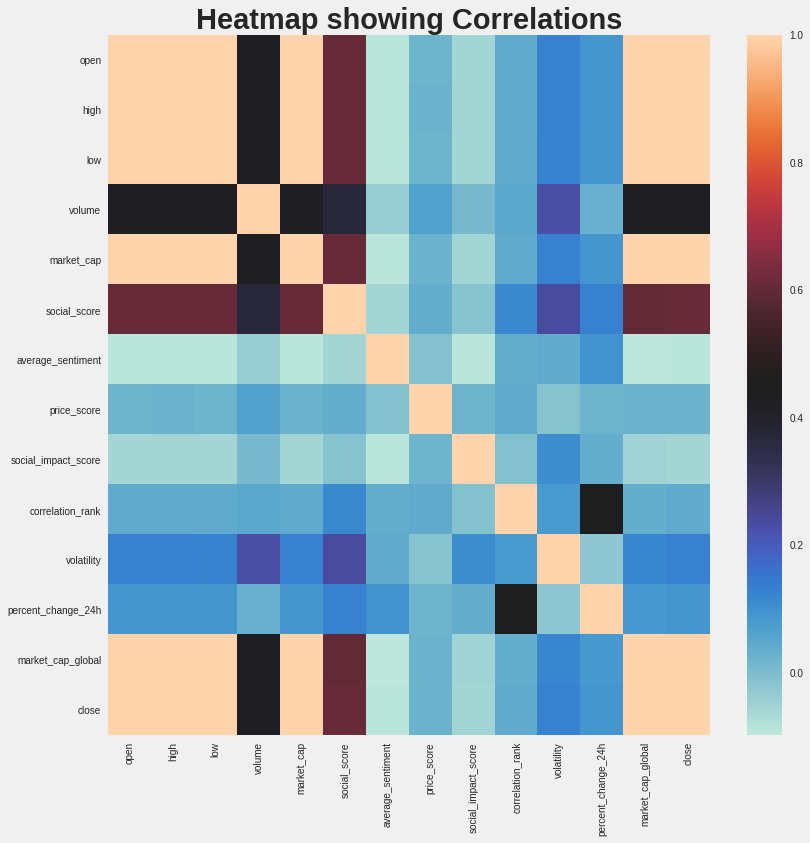

In [42]:
plt.figure(figsize=(12,12))
sns.heatmap(correlations, cmap='icefire')
plt.title("Heatmap showing Correlations", fontweight='bold', fontsize=29)
plt.show()

## Implementing the solution

### Detecting multicollinearity

In [43]:
# Checking for multicollinearity on the independent variables only

F = df.drop(['id','close'], 1)
correlations = F.corr()
correlations

,open,high,low,volume,market_cap,social_score,average_sentiment,price_score,social_impact_score,correlation_rank,volatility,percent_change_24h,market_cap_global
open,1.000000,0.999962,0.999958,0.428346,0.999930,0.607087,-0.089777,0.022523,-0.058593,0.040556,0.131092,0.087010,0.998866
high,0.999962,1.000000,0.999932,0.429736,0.999959,0.608155,-0.089815,0.022883,-0.058592,0.040608,0.132778,0.087098,0.998821
low,0.999958,0.999932,1.000000,0.426669,0.999952,0.606057,-0.089720,0.022381,-0.058634,0.040500,0.129749,0.088388,0.998971
volume,0.428346,0.429736,0.426669,1.000000,0.428635,0.369232,-0.039408,0.064105,0.005715,0.051112,0.231335,0.028669,0.426194
market_cap,0.999930,0.999959,0.999952,0.428635,1.000000,0.607594,-0.091065,0.023039,-0.057332,0.040541,0.131505,0.087691,0.999001
social_score,0.607087,0.608155,0.606057,0.369232,0.607594,1.000000,-0.055199,0.037289,-0.011860,0.113489,0.238709,0.133521,0.598869
average_sentiment,-0.089777,-0.089815,-0.089720,-0.039408,-0.091065,-0.055199,1.000000,-0.011448,-0.090843,0.036460,0.040512,0.097703,-0.097406
price_score,0.022523,0.022883,0.022381,0.064105,0.023039,0.037289,-0.011448,1.000000,0.022526,0.040542,-0.013233,0.019728,0.024363
social_impact_score,-0.058593,-0.058592,-0.058634,0.005715,-0.057332,-0.011860,-0.090843,0.022526,1.000000,-0.007562,0.104802,0.038109,-0.053630
correlation_rank,0.040556,0.040608,0.040500,0.051112,0.040541,0.113489,0.036460,0.040542,-0.007562,1.000000,0.082305,0.454173,0.038848


The table above shows us how each variable relates to another. The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself. Let's use these correlations to compute the VIF score for each variable. This will require a little bit of linear algebra, but the approach is straightforward: we create a new dataframe with the *inverse* of the matrix above.

> VIF score to detect multicollinearity for the dataset

In [44]:
#dataframe with the inverse of the correlations matrix for train data
#use these correlations to compute the VIF score for each variable
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,open,high,low,volume,market_cap,social_score,average_sentiment,price_score,social_impact_score,correlation_rank,volatility,percent_change_24h,market_cap_global
open,26446.374299,-19434.122178,-17245.208188,-6.194891,10474.356888,-8.774114,8.247699,0.676731,-13.601914,-10.704133,8.592830,23.043535,-236.189411
high,-19434.122178,30525.121803,8100.309087,-22.111027,-20400.689123,-0.215289,-13.615590,-1.502277,21.618002,2.008718,-19.945682,3.558144,1222.756627
low,-17245.208188,8100.309087,24461.331176,33.295241,-15171.700481,29.050868,-18.105389,5.939202,17.595049,10.086799,10.887064,-30.191695,-176.498906
volume,-6.194891,-22.111027,33.295241,1.382115,-3.589587,-0.120387,-0.010442,-0.056059,-0.005291,-0.009500,-0.158402,-0.026253,-1.897094
market_cap,10474.356888,-20400.689123,-15171.700481,-3.589587,26563.443871,-26.775687,21.151711,-4.281825,-23.818860,0.204913,-3.050506,-0.214949,-1447.811338
social_score,-8.774114,-0.215289,29.050868,-0.120387,-26.775687,1.813293,0.033564,-0.025954,-0.004467,-0.079045,-0.170845,-0.121110,5.710247
average_sentiment,8.247699,-13.615590,-18.105389,-0.010442,21.151711,0.033564,1.076602,-0.004602,0.075915,0.011858,-0.063469,-0.106854,2.426963
price_score,0.676731,-1.502277,5.939202,-0.056059,-4.281825,-0.025954,-0.004602,1.011930,-0.017251,-0.037793,0.041235,-0.005017,-0.820754
social_impact_score,-13.601914,21.618002,17.595049,-0.005291,-23.818860,-0.004467,0.075915,-0.017251,1.072411,0.058389,-0.151291,-0.102445,-1.692900
correlation_rank,-10.704133,2.008718,10.086799,-0.009500,0.204913,-0.079045,0.011858,-0.037793,0.058389,1.291734,-0.118948,-0.607735,-1.524037


### Data Preprocessing

In [45]:
# Creating the X and y variables

X = df.drop(['id','close'], axis=1)
y = df['close']


> Standardization

In [46]:
# define standard scaler
scaler = StandardScaler()
# transform data
scaler.fit_transform(X)

array([[-0.41614154, -0.41699155, -0.41471284, ..., -0.57786984,
         0.29786512, -0.39419557],
       [-0.51619189, -0.51636221, -0.51662775, ..., -0.40998087,
        -0.72394473, -0.54339372],
       [ 2.3525191 ,  2.34781859,  2.36168256, ..., -0.11000127,
         1.2183627 ,  2.30173657],
       ...,
       [-0.57741636, -0.57767913, -0.57743169, ..., -0.71797177,
         0.01711153, -0.5605054 ],
       [ 2.26434607,  2.25012451,  2.27002393, ...,  0.25390373,
         0.04422419,  2.25085849],
       [-0.51151605, -0.51114855, -0.510677  , ...,  0.21296519,
        -0.00534239, -0.53791815]])

> Splitting the data

In [47]:
#splitting our data into training and test sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# The above script splits 80% of the data to training set while 20% of the data to test set. 
# The test_size variable is where we actually specify the proportion of test set.

### Simple Linear Regression

In [48]:
# Training the Algorithm
#from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
# Getting the intercept and slope
# ---
# intercept

print(regressor.intercept_)

# slope
# 
print(regressor.coef_)

10.774502848553311
[-4.40203585e-01  6.51097470e-01  4.67870125e-01 -1.41156113e-09
  1.73474728e-08 -1.70768098e-07  3.06978501e+01 -1.35333126e+00
 -9.26124865e+00 -3.62122227e+00 -1.20135283e+02  1.06679789e+00
 -1.34666722e-10]


In [50]:
# Making Predictions
# ---
# 
y_pred = regressor.predict(X_test)

# To compare the actual output values for X_test with the predicted values, execute the following 
pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred

,Actual,Predicted
6355,11356.177784,11390.587003
2781,8560.955785,8557.038812
6044,13134.981960,13172.642270
3287,8323.141233,8298.997920
5343,11396.825669,11403.383801
...,...,...
2902,19064.848450,19123.752900
4447,7138.132566,7140.934639
4929,18431.427227,18452.960188
359,7177.633843,7177.310927


> We will note from the output that though our model is not very precise, 
 the predicted percentages are somehow close to the actual ones.

#### Residual plots and heteroskedasticity testing

In [51]:
# This is our prediction for price based on our model
y_pred = regressor.predict(X_test)
print(y_pred)
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset
residuals = np.subtract(y_pred, y_test)
print('residuals:\n',residuals)
# Let's describe our residual:
pd.DataFrame(residuals).describe()

print('residuals mean:\n',residuals.mean())

[11390.58700306  8557.03881189 13172.64227045  8298.99791972
 11403.38380106 38009.47570834  9661.07807758  8453.96734196
  7550.60943878  8173.06074481 51520.1295396   6703.31540614
  9092.65481047 58439.90339511  8154.69587369  8779.65170833
 11270.09789632  9585.93352655  7202.35074131  7096.3764859
 58454.78418612 19356.93280541 54869.31599333  8506.71424163
  9134.17138753  7252.63472793 56726.39110772  6644.69020256
  9809.40058328  8244.28640927  9218.89853728 49234.12984226
 55521.67480775 18008.72015468  7908.77015759 47334.07973714
 15724.23216955 10566.59269108  7927.9578731  18797.78148079
 53314.44983427 15169.71398757  8510.0759498   8599.88578061
 10022.53067368 18689.25287273 19381.80138891  7199.33590361
  8114.76591328  7295.75967418  7378.00452334 57782.98956405
 58476.18470249 10638.81539726 49842.65212854  9413.00209244
  7245.83410189 11249.17498726  8609.76303678 19201.9040405
 21837.38620609  8311.78496343  6761.95222233 44446.89295533
 57144.7030204   8729.9714

> Let's show the residual plot

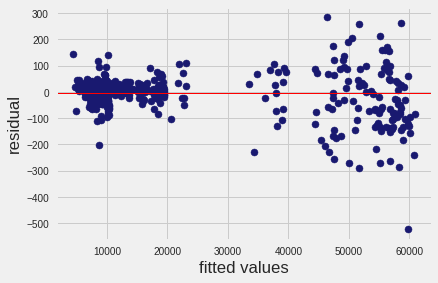

In [52]:
plt.scatter(y_pred, residuals, color='midnightblue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

This does not look too bad: our residuals are centered around a mean that is very close to 0, and there are no glaringly obvious patterns. Let's be thorough though, and perform a heteroskedasticity test.

For this we will use [bartlett's test](https://www.itl.nist.gov/div898/handbook/eda/section3/eda357.htm). The test establishes as a null hypothesis that the variance is equal for all our datapoints,and the new hypothesis that the variance is different for at least one pair of datapoints.


In [53]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# We compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

# If the test_result is greater than the critical value, then
# this would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed.')
else:
  print('The variances are homogeneous.')

The variances are homogeneous.


In [54]:
# The R2 score and RMSE for the linear model is 



from sklearn.metrics import r2_score

linear_R2 = a = r2_score(y_test, y_pred)
print("The R2 score for the linear model is:", linear_R2)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

The R2 score for the linear model is: 0.9999858020005784
Mean Absolute Error: 31.67397571766414
Mean Squared Error: 3098.8249387628625
Root Mean Squared Error: 55.667090266717395


### Lasso Regression

In [55]:
# instantiating the model

lasso = Lasso(normalize=False)

# fitting the model
lasso.fit(X_train, y_train)

# making predictions
lasso_pred = lasso.predict(X_test)

# assessing the model

print("Lasso Model Metrics")
print("Lasso regression r2 score: ", r2_score(y_test, lasso_pred))
print("Lasso mean absolute error: ", mean_absolute_error(y_test, lasso_pred))
print("Lasso Root mean squared error: ", np.sqrt(mean_squared_error(y_test, lasso_pred)))

Lasso Model Metrics
Lasso regression r2 score:  0.9998683033147395
Lasso mean absolute error:  69.7470256780365
Lasso Root mean squared error:  169.54007315099074


In [56]:
# Hyperparamter tuning of alpha parameter

clf = GridSearchCV(estimator=Lasso(),
                   param_grid = {'alpha' : np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))},
                   scoring = 'neg_root_mean_squared_error',
                   cv = 10,
                   refit = True)

clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.5,  3. ,
        3.5,  4. ,  4.5,  5. ,  6. ,  7. ,  8. ,  9. , 10. , 11. , 12. ,
       13. , 14. , 15. , 16. , 17. , 18. , 19. , 20. , 21. , 22. , 23. ,
       24. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_root_mean_squared_error', verbose=0)

In [57]:
# best performing model
clf.best_estimator_

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Default Regressor was the best fit. Examining the coefficients produced

In [58]:
lasso_coefficients = {column : coef for column, coef in zip(X_train.columns, lasso.coef_ * 100)}

pd.DataFrame.from_dict(data=lasso_coefficients, orient = 'index',
                       columns = ['Coefficients * 100']).sort_values(by='Coefficients * 100', ascending=False)


,Coefficients * 100
percent_change_24h,4.897983e+02
price_score,2.147640e+02
open,9.990299e+01
high,6.207148e-02
volume,1.927766e-07
market_cap,1.618542e-09
market_cap_global,4.983593e-10
average_sentiment,-0.000000e+00
social_impact_score,-0.000000e+00
volatility,0.000000e+00


### Ridge Regression

In [59]:
# Instantiating the model
ridge = Ridge(normalize=True)

# Tuning the L2 parameter
clf = GridSearchCV(estimator = ridge,
                   param_grid = {'alpha':np.logspace(-5,2,8)},
                   scoring = 'neg_root_mean_squared_error',
                   cv = 10,
                   )

clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=True, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_root_mean_squared_error', verbose=0)

In [60]:
# best estimator
clf.best_estimator_

Ridge(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [61]:
# fitting best estimator and assessing it's performance
ridge = Ridge(alpha = 1e-05, normalize=True, max_iter = 10000, random_state=0)

ridge.fit(X_train, y_train)

# predictions and assessment
ridge_pred = ridge.predict(X_test)

print("Ridge Metrics")
print("R2 score: ", r2_score(y_test, ridge_pred))
print("Mean absolute error: ", mean_absolute_error(y_test, ridge_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, ridge_pred)))

Ridge Metrics
R2 score:  0.9999828353267758
Mean absolute error:  35.74800371847239
Root Mean Squared Error:  61.20722839430657


In [62]:
# Ridge coefficients
ridge_coef = {column : coef for column, coef in zip(X_train.columns, ridge.coef_)}

pd.DataFrame.from_dict(data = ridge_coef,
                       orient = 'index',
                       columns = ['Coefficients']).sort_values(by = 'Coefficients', ascending=False)

,Coefficients
average_sentiment,4.078296e+01
percent_change_24h,1.508432e+00
high,5.045958e-01
low,3.610163e-01
market_cap,2.138322e-08
market_cap_global,-1.566905e-10
volume,-1.785258e-09
social_score,-1.860079e-07
open,-2.614608e-01
price_score,-1.271400e+00


### Elastic Net

In [63]:
elastic = ElasticNet()

clf = GridSearchCV(estimator = elastic,
                   param_grid = {'alpha' : np.logspace(-5,2,8),
                                 'l1_ratio' : [.2,.4,.6,.8]},
                   cv = 10,
                   refit = True,
                   scoring = 'neg_root_mean_squared_error')

clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'l1_ratio': [0.2, 0.4, 0.6, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_root_mean_squared_error', verbose=0)

In [64]:
# best estimator
clf.best_estimator_

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.6,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [65]:
# fitting new parameters and assessing
elastic = ElasticNet(alpha=0.01, l1_ratio = 0.2)
elastic.fit(X_train, y_train)

# predictions
elastic_pred = elastic.predict(X_test)
# assessing
print("Elastic Net Metrics")
print("Mean absolute error: ", mean_absolute_error(y_test, elastic_pred))
print("Root mean squared error: ", np.sqrt(mean_squared_error(y_test, elastic_pred)))
print("R2 score: ", r2_score(y_test, elastic_pred))

Elastic Net Metrics
Mean absolute error:  65.13641363923261
Root mean squared error:  156.33440247155275
R2 score:  0.9998880203185226


In [66]:
# coefficient importance
e_coef = {column : coef for column, coef in zip(X_train.columns, elastic.coef_)}

pd.DataFrame.from_dict(e_coef, 
                       orient='index', columns= ['Coefs']).sort_values(by='Coefs', ascending=False)

,Coefs
volatility,9.211265e+00
percent_change_24h,5.247449e+00
price_score,2.956376e+00
open,8.841729e-01
high,7.333537e-02
market_cap,2.356823e-09
market_cap_global,1.587528e-10
volume,-6.518000e-11
social_score,-1.564594e-07
low,-7.129445e-03


### Random Forest Regressor

> Since Random Forest is a bootstrapping technique that picks from different set of features for different models, every model sees a different set of data points and this means that the Random Forest algorithm is not affected by multicollinearity.



In [67]:
# Feature and label seperation
X = df.drop(['id','close'], axis=1)
y = df['close']


# Splitting the data into test and train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [68]:
# Instantiate model with 1000 decision trees
rf_mod  =  RandomForestRegressor(n_estimators=1000, random_state=42)

# Train the model

rf_mod  =  rf_mod.fit(X_train, y_train)

In [69]:
# Making predictions based on the trained model 

rf_pred = rf_mod.predict(X_test)

In [70]:
# Model Evaluation

print('Mean Absolute Error (RF):', mean_absolute_error(y_test, rf_pred))  
print('Mean Squared Error (RF):', mean_squared_error(y_test, rf_pred))  
print('Root Mean Squared Error (RF):', np.sqrt(mean_squared_error(y_test, rf_pred)))

Mean Absolute Error (RF): 32.19545028975033
Mean Squared Error (RF): 5965.474966141063
Root Mean Squared Error (RF): 77.23648727215048




> The random forest model achieved an RMSE of 66.53 which is poorer compared to our baseline model.



#### Feature importance

In [71]:
# Get numerical feature importances
importances = list(rf_mod.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(X, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: high                 Importance: 0.338
Variable: open                 Importance: 0.179
Variable: market_cap_global    Importance: 0.165
Variable: market_cap           Importance: 0.163
Variable: low                  Importance: 0.155
Variable: volume               Importance: 0.0
Variable: social_score         Importance: 0.0
Variable: average_sentiment    Importance: 0.0
Variable: price_score          Importance: 0.0
Variable: social_impact_score  Importance: 0.0
Variable: correlation_rank     Importance: 0.0
Variable: volatility           Importance: 0.0
Variable: percent_change_24h   Importance: 0.0


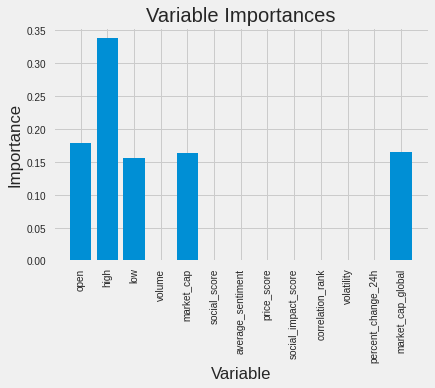

In [72]:
# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, X, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances');

> At the top of the list of important features is market cap global followed by market cap which indicate the total dollar market value of an asset. This tells us that the best predictors of the closing price of a crypto is the market capitalizations of the coin, which is a rather intuitive finding. 

> Other relatively important factors are the various prices the cryptocurrency ranged at within the one hour timeframe, the open price of the coin, the highest price and the lowest price. 





### XGBOOST

In [73]:
# Import the regressor needed

from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score


# Instantiate the model
xgb = XGBRegressor(max_depth = 5, eta = 0.5, booster = 'gbtree')

In [74]:
# Training the model
xgb.fit(X_train,y_train)

# Making predictions on the model trained
xgb_pred = xgb.predict(X_test)

[08:27:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [75]:
# Model Evaluation

print('Mean Absolute Error (XGB):', mean_absolute_error(y_test, xgb_pred))  
print('Mean Squared Error (XGB):', mean_squared_error(y_test, xgb_pred))  
print('Root Mean Squared Error (XGB):', np.sqrt(mean_squared_error(y_test, xgb_pred)))

Mean Absolute Error (XGB): 43.83225308972814
Mean Squared Error (XGB): 8165.948098180165
Root Mean Squared Error (XGB): 90.36563560436105


### Light GBM


In [76]:
# creating Lightgbm datasets
lgbm_train = lightgbm.Dataset(X_train, label = y_train)
lgbm_test = lightgbm.Dataset(X_test, label = y_test)

In [77]:
# Specifying parameters

parameters = {'objective' : 'regression',
              'metric' : 'root_mean_squared_error',
              'boosting' : 'gbdt',
              'num_leaves' : 50,
              'feature_fraction' : 0.5,
              'bagging_fraction' : 0.5,
              'bagging_freq' : 100,
              'learning_rate' : 0.005,
              'verbose' : -1}
      


In [78]:
# Training the model
model_lgbm  = lightgbm.train(params=parameters,
                             train_set = lgbm_train,
                             num_boost_round = 10000,
                             valid_sets = lgbm_test,
                             early_stopping_rounds = 100)


[1]	valid_0's rmse: 14701.9
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 14628.5
[3]	valid_0's rmse: 14555.6
[4]	valid_0's rmse: 14482.9
[5]	valid_0's rmse: 14410.6
[6]	valid_0's rmse: 14338.9
[7]	valid_0's rmse: 14267.3
[8]	valid_0's rmse: 14196
[9]	valid_0's rmse: 14125.2
[10]	valid_0's rmse: 14054.6
[11]	valid_0's rmse: 13984.4
[12]	valid_0's rmse: 13914.5
[13]	valid_0's rmse: 13845.3
[14]	valid_0's rmse: 13776.2
[15]	valid_0's rmse: 13727.3
[16]	valid_0's rmse: 13658.9
[17]	valid_0's rmse: 13590.7
[18]	valid_0's rmse: 13522.9
[19]	valid_0's rmse: 13455.5
[20]	valid_0's rmse: 13388.3
[21]	valid_0's rmse: 13321.5
[22]	valid_0's rmse: 13255
[23]	valid_0's rmse: 13188.9
[24]	valid_0's rmse: 13123.1
[25]	valid_0's rmse: 13057.7
[26]	valid_0's rmse: 12992.7
[27]	valid_0's rmse: 12927.9
[28]	valid_0's rmse: 12863.4
[29]	valid_0's rmse: 12799.3
[30]	valid_0's rmse: 12735.5
[31]	valid_0's rmse: 12672
[32]	valid_0's rmse: 12608.7
[33]	valid_0's rmse: 125

In [79]:
# predictions and assessment
lgbm_pred = model_lgbm.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, lgbm_pred)))

400.52212647196126


### Polynomial Regression

In [108]:
#Fitting the polynomial features to the X_train and X_test

poly_features = PolynomialFeatures(degree = 2)
X_poly_train= poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Training the model
regressor = LinearRegression()
regressor.fit(X_poly_train, y_train)

# Making predictions
y_pred1 = regressor.predict(X_poly_test)

# Measuring the accuracy of the model

print("The RMSE score for the polynomial model : ", np.sqrt(mean_squared_error(y_test, y_pred1)))

The RMSE score for the polynomial model :  164.55964711085258


## Challenging the solution

## Follow up questions